In [1]:
# Import libraries:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sqlalchemy import create_engine

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Edit pandas display option to show more rows and columns:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Load the dataset:

In [3]:
# Query the database to extract dataset:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('SELECT * FROM houseprices', con=engine)

# Dispose the connection, as we're only doing a single query:
engine.dispose()

# Print out the head of the dataset:
df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


### Deal with missing data 

In [4]:
# Explore column datatypes and missing values:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [5]:
# Calculate the % of missing data for each variable:
missing = df.isnull().sum()/len(df)
print(missing[missing>0])

lotfrontage     0.177397
alley           0.937671
masvnrtype      0.005479
masvnrarea      0.005479
bsmtqual        0.025342
bsmtcond        0.025342
bsmtexposure    0.026027
bsmtfintype1    0.025342
bsmtfintype2    0.026027
electrical      0.000685
fireplacequ     0.472603
garagetype      0.055479
garageyrblt     0.055479
garagefinish    0.055479
garagequal      0.055479
garagecond      0.055479
poolqc          0.995205
fence           0.807534
miscfeature     0.963014
dtype: float64


In [6]:
# We'll drop 'alley', 'poolqc', 'fence' and 'miscfeature' columns since they contain too many missing entries:
df = df.drop(['alley', 'poolqc', 'fence', 'miscfeature', 'fireplacequ', 'id'], axis=1)

# Fill in missing values with mean value for each numerical variable:
df['lotfrontage'] = df['lotfrontage'].fillna(df['lotfrontage'].mean())
df['masvnrarea'] = df['masvnrarea'].fillna(df['masvnrarea'].mean())

# Fill in missing values with the most frequent value for each categorical variable:
df['masvnrtype'] = df['masvnrtype'].fillna(df['masvnrtype'].value_counts().index[0])
df['bsmtqual'] = df['bsmtqual'].fillna(df['bsmtqual'].value_counts().index[0])
df['bsmtcond'] = df['bsmtcond'].fillna(df['bsmtcond'].value_counts().index[0])
df['bsmtexposure'] = df['bsmtexposure'].fillna(df['bsmtexposure'].value_counts().index[0])
df['bsmtfintype1'] = df['bsmtfintype1'].fillna(df['bsmtfintype1'].value_counts().index[0])
df['bsmtfintype2'] = df['bsmtfintype2'].fillna(df['bsmtfintype2'].value_counts().index[0])
df['electrical'] = df['electrical'].fillna(df['electrical'].value_counts().index[0])
df['garagetype'] = df['garagetype'].fillna(df['garagetype'].value_counts().index[0])
df['garageyrblt'] = df['garageyrblt'].fillna(df['garageyrblt'].value_counts().index[0])
df['garagefinish'] = df['garagefinish'].fillna(df['garagefinish'].value_counts().index[0])
df['garagequal'] = df['garagequal'].fillna(df['garagequal'].value_counts().index[0])
df['garagecond'] = df['garagecond'].fillna(df['garagecond'].value_counts().index[0])

In [7]:
# Inspect any funky categorical value:
df_object = df.select_dtypes(include = 'object').columns
for i in df_object:
    print(df[i].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: mszoning, dtype: int64
Pave    1454
Grvl       6
Name: street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: lotshape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: landcontour, dtype: int64
AllPub    1459
NoSeWa       1
Name: utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: lotconfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: landslope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: neighborhood, dtype: int64
Norm      1260
Feedr       81
Artery     

### EAD and Feature Engineering:

In [8]:
# Inspect numeric variables:
df_num = df.select_dtypes(['int64', 'float64']).columns
print(df_num)
print('')
print("The number of non-numerical columns is {}".format(len(df_num)))

Index(['mssubclass', 'lotfrontage', 'lotarea', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd', 'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf', 'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch', 'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice'], dtype='object')

The number of non-numerical columns is 37


In [9]:
df.describe()

,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1979.976027,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.749688,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1984.500000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
# Inspect non-numeric variables:
df_object = df.select_dtypes(include = 'object').columns
print(df_object)
print('')
print("The number of non-numerical columns is {}".format(len(df_object)))

Index(['mszoning', 'street', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual', 'functional', 'garagetype', 'garagefinish', 'garagequal', 'garagecond', 'paveddrive', 'saletype', 'salecondition'], dtype='object')

The number of non-numerical columns is 38


In [11]:
df.describe(include='object')

,mszoning,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,heating,heatingqc,centralair,electrical,kitchenqual,functional,garagetype,garagefinish,garagequal,garagecond,paveddrive,saletype,salecondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,872,906,1282,647,686,1348,991,467,1294,1428,741,1365,1335,735,1360,951,686,1392,1407,1340,1267,1198


In [12]:
# Use one-hot-encoder for those variables with 2 unique values:
df['street'] = pd.get_dummies(df['street'], drop_first=True)
df['utilities'] = pd.get_dummies(df['utilities'], drop_first=True)
df['centralair'] = pd.get_dummies(df['centralair'], drop_first=True)

df.describe(include='object')

,mszoning,lotshape,landcontour,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,heating,heatingqc,electrical,kitchenqual,functional,garagetype,garagefinish,garagequal,garagecond,paveddrive,saletype,salecondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,4,4,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,5,4,7,6,3,5,5,3,9,6
top,RL,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,925,1311,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,872,906,1282,647,686,1348,991,467,1294,1428,741,1335,735,1360,951,686,1392,1407,1340,1267,1198


In [13]:
# Use label ecoder to transform categorical variables to numeric variables:
from sklearn.preprocessing import LabelEncoder

df_object = df.select_dtypes(include='object')
df_num = df.select_dtypes(exclude='object')

df_object = df_object.apply(LabelEncoder().fit_transform)

df_full = df_object.join(df_num)
df_full.head()

,mszoning,lotshape,landcontour,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,heating,heatingqc,electrical,kitchenqual,functional,garagetype,garagefinish,garagequal,garagecond,paveddrive,saletype,salecondition,mssubclass,lotfrontage,lotarea,street,utilities,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,centralair,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,3,3,3,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,4,2,6,1,1,4,4,2,8,4,60,65.0,8450,1,0,7,5,2003,2003,196.0,706,0,150,856,1,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,3,3,3,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,4,3,6,1,1,4,4,2,8,4,20,80.0,9600,1,0,6,8,1976,1976,0.0,978,0,284,1262,1,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,0,3,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,4,2,6,1,1,4,4,2,8,4,60,68.0,11250,1,0,7,5,2001,2002,162.0,486,0,434,920,1,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,3,0,3,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,4,2,6,5,2,4,4,2,8,0,70,60.0,9550,1,0,7,5,1915,1970,0.0,216,0,540,756,1,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,3,0,3,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,4,2,6,1,1,4,4,2,8,4,60,84.0,14260,1,0,8,5,2000,2000,350.0,655,0,490,1145,1,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


### Deal with outliners:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c20cd4890>,
      dtype=object)

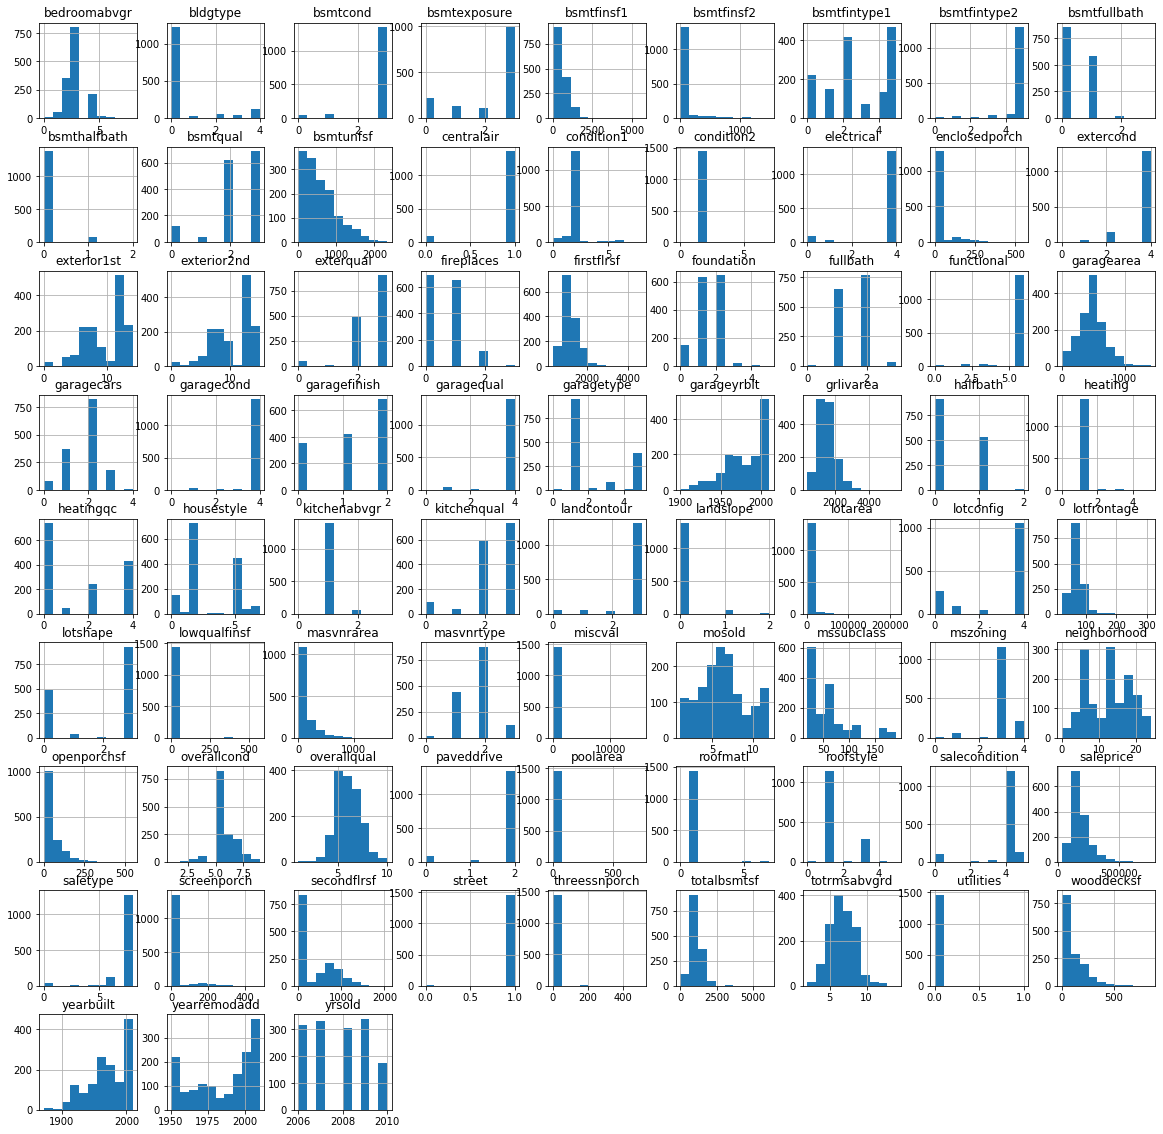

In [14]:
df_full.hist(figsize=(20,20))

Skewness: 1.882876
Kurtosis: 6.536282


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2378d290>,
      dtype=object)

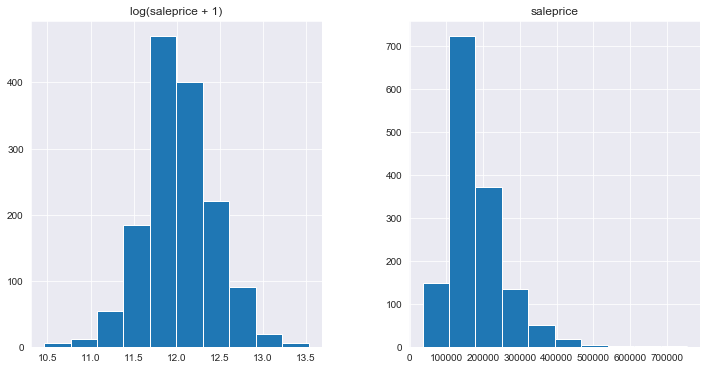

In [15]:
# Let's first take a look at the target variable (saleprice). As we can see from the chart above, saleprice is
# not normally distributed. It is right skewed. Let's see what's the skewness of saleprice variable:
print("Skewness: %f" % df_full['saleprice'].skew())
print("Kurtosis: %f" % df_full['saleprice'].kurt())

# Visualize distribution before and after log transformation:
sns.set_style('darkgrid')

prices = pd.DataFrame({'log(saleprice + 1)':np.log1p(df_full['saleprice']), 'saleprice':df_full['saleprice']})
prices.hist(figsize=(12,6))

In [16]:
# Log transform skewed numeric features for any features with skewness >0.75:
feats = df_full.dtypes[df_full.dtypes != 'object'].index

skewed_feats = df_full[feats].apply(lambda x: x.skew()) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

df_full[skewed_feats] = np.log1p(df_full[skewed_feats])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c23765c10>,
      dtype=object)

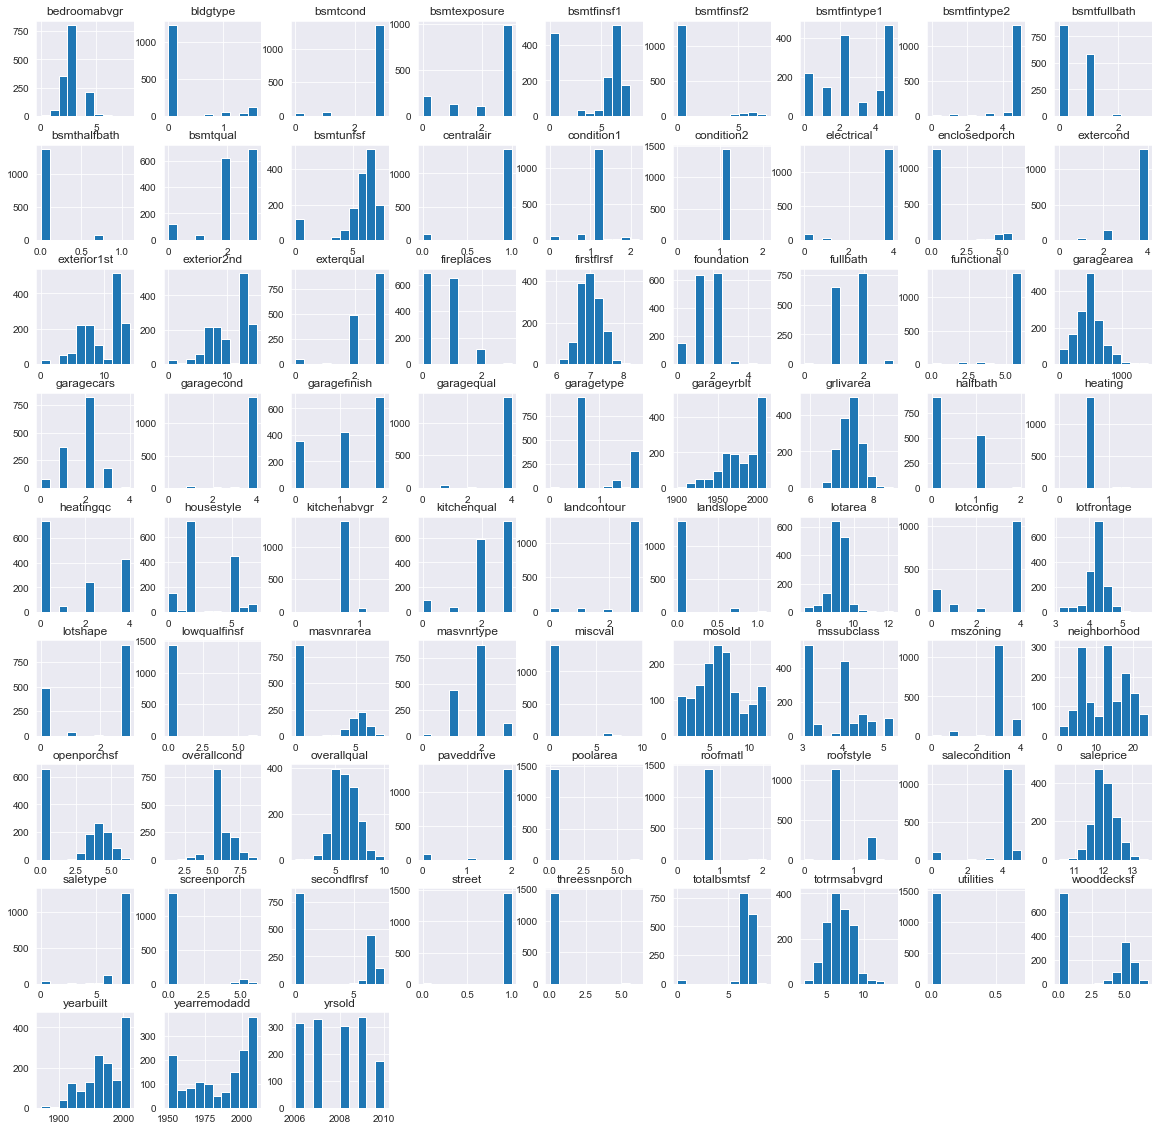

In [17]:
df_full.hist(figsize=(20,20))

### Eliminate highly correlated features

In [28]:
# Split the dataset into dependent and independent variables:
df_indep = df_full.drop(['saleprice'], axis=1)
df_dep = df_full['saleprice']

# Create correlation matrix
corr_matrix = df_indep.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

df_indep.drop(df_indep[to_drop], axis=1)

# Join the 2 dataset back together:
df_full = df_indep.join(df_dep)
df_full.head()

,mszoning,lotshape,landcontour,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,heating,heatingqc,electrical,kitchenqual,functional,garagetype,garagefinish,garagequal,garagecond,paveddrive,saletype,salecondition,mssubclass,lotfrontage,lotarea,street,utilities,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,centralair,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,3,3,3,4,0.0,5,1.098612,1.098612,0.0,5,0.693147,0.693147,12,13,1,2,4,2,2,3,3,2,5,0.693147,0,4,2,6,0.693147,1,4,4,2,8,4,4.110874,4.189655,9.042040,1,0.0,7,5,2003,2003,5.283204,6.561031,0.0,5.017280,6.753438,1,6.753438,6.751101,0.0,7.444833,1,0.000000,2,1,3,0.693147,8,0,2003.0,2,548,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,2,2008,12.247699
1,3,3,3,2,0.0,24,0.693147,1.098612,0.0,2,0.693147,0.693147,8,8,2,3,4,1,2,3,1,0,5,0.693147,0,4,3,6,0.693147,1,4,4,2,8,4,3.044522,4.394449,9.169623,1,0.0,6,8,1976,1976,0.000000,6.886532,0.0,5.652489,7.141245,1,7.141245,0.000000,0.0,7.141245,0,0.693147,2,0,3,0.693147,6,1,1976.0,2,460,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,5,2007,12.109016
2,3,0,3,4,0.0,5,1.098612,1.098612,0.0,5,0.693147,0.693147,12,13,1,2,4,2,2,3,2,2,5,0.693147,0,4,2,6,0.693147,1,4,4,2,8,4,4.110874,4.234107,9.328212,1,0.0,7,5,2001,2002,5.093750,6.188264,0.0,6.075346,6.825460,1,6.825460,6.765039,0.0,7.488294,1,0.000000,2,1,3,0.693147,6,1,2001.0,2,608,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,9,2008,12.317171
3,3,0,3,0,0.0,6,1.098612,1.098612,0.0,5,0.693147,0.693147,13,15,2,3,4,0,3,1,3,0,5,0.693147,2,4,2,6,1.791759,2,4,4,2,8,0,4.262680,4.110874,9.164401,1,0.0,7,5,1915,1970,0.000000,5.379897,0.0,6.293419,6.629363,1,6.869014,6.629363,0.0,7.448916,1,0.000000,1,0,3,0.693147,7,1,1998.0,3,642,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,2,2006,11.849405
4,3,0,3,2,0.0,15,1.098612,1.098612,0.0,5,0.693147,0.693147,12,13,1,2,4,2,2,3,0,2,5,0.693147,0,4,2,6,0.693147,1,4,4,2,8,4,4.110874,4.442651,9.565284,1,0.0,8,5,2000,2000,5.860786,6.486161,0.0,6.196444,7.044033,1,7.044033,6.960348,0.0,7.695758,1,0.000000,2,1,4,0.693147,9,1,2000.0,3,836,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,12,2008,12.429220


In [27]:
# Correlation matrix:
corr_matrix = df_full.corr()['saleprice'].abs()
corr_matrix[corr_matrix > 0.5]

exterqual       0.582164
bsmtqual        0.578729
kitchenqual     0.534387
garagefinish    0.574119
overallqual     0.817185
yearbuilt       0.586570
yearremodadd    0.565608
firstflrsf      0.608955
grlivarea       0.730254
fullbath        0.594771
totrmsabvgrd    0.534422
garagecars      0.680625
garagearea      0.650888
saleprice       1.000000
Name: saleprice, dtype: float64

### Regression model:

In [31]:
X = df_full[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'fullbath']]
Y = df_full['saleprice']

In [32]:
import statsmodels.api as sm

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     1079.
Date:                Sun, 05 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:39:33   Log-Likelihood:                 400.01
No. Observations:                1460   AIC:                            -788.0
Df Residuals:                    1454   BIC:                            -756.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.3120      0.135     61.389      0.000       8.046       8.578
overallqual     0.1364      0.005     27.334      0.000       0.127       0.146
grlivarea       0.3605      0.021     17.046      0.000       0.319       0.402
garagecars      0.0741      0.014      5.124      0.000       0.046       0.102
garagearea      0.0002   4.85e-05      4.160      0.000       0.000       0.000
fullbath        0.0213      0.012      1.756      0.079      -0.002       0.045
==============================================================================
Omnibus:                      313.496   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1256.172
Skew:                          -0.983   Prob(JB):                    1.68e-273
Kurtosis:                       7.097   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""